<a href="https://colab.research.google.com/github/kude0930/DeepLearning_B/blob/main/%EB%B0%B1%EA%B2%AC%EB%B6%88%EC%97%AC%EC%9D%BC%ED%83%80_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%9E%85%EB%AC%B8_with_Tensorflow_2_x_Ch_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **3.1 기본 연산 해보기**

**3.1.1 텐서를 통한 표현**

In [ ]:
# Tensor의 차원과 기본 연산
import tensorflow as tf
import numpy as np

a = tf.constant(2)
print(tf.rank(a))

tf.Tensor(0, shape=(), dtype=int32)


In [ ]:
b = tf.constant([1, 2])
print(tf.rank(b))

tf.Tensor(1, shape=(), dtype=int32)


In [ ]:
c = tf.constant([[1, 2], [3, 4]])
print(tf.rank(c))

tf.Tensor(2, shape=(), dtype=int32)


# **3.2 신경망**

**3.1.2 즉시 실행 모드를 통한 연산**

In [ ]:
# 즉시 실행 모드를 통한 연산
import tensorflow as tf
import numpy as np

a = tf.constant(3)
b = tf.constant(2)

# 기본 연산
# 텐서 형태로 출력해보기
print(tf.add(a, b)) # 더하기
print(tf.subtract(a, b)) # 빼기

# 넘파이 배열 형태로 출력해보기
print(tf.multiply(a, b).numpy()) # 곱하기
print(tf.divide(a, b).numpy()) # 나누기

tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
6
1.5


In [ ]:
# Tensor에서 NumPy로, Numpy에서 Tensor로
import tensorflow as tf
import numpy as np

c = tf.add(a, b).numpy() # a, b를 더한 후 NumPy 배열 형태로 변환
c_square = np.square(c, dtype= np.float32)

# NumPy Moduel에 존재하는 square 함수를 적용
c_tensor = tf.convert_to_tensor(c_square) # 다시 Tensor로 변환

# NumPy 배열과 Tensor 각각을 확인하기 위해 출력
print('numpy array : %0.1f, applying square with numpy : %0.1f, convert_to_tensor : %0.1f' % (c, c_square, c_tensor))

numpy array : 5.0, applying square with numpy : 25.0, convert_to_tensor : 25.0


**3.1.3 @tf.function**

In [ ]:
# @tf.function
import tensorflow as tf
#import numpy as np

@tf.function # Python으로 구성된 함수를 Tensorflow의 그래프 형태로 다루고 싶을 때 사용
def square_pos(x):
  if x > 0 :
    x = x * x
  else :
    x = x * (-1)
  return x

print(square_pos(tf.constant(2)))


tf.Tensor(4, shape=(), dtype=int32)


**3.2.1 퍼셉트론**

In [ ]:
# OR Gate 구현해보기
import tensorflow as tf
tf.random.set_seed(777)

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import mse

# 데이터 준비하기
x = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
y = np.array([[0], [1], [1] ,[1]]) # OR, AND, NAND 등 진리표대로 수정

# 모델 구성하기
model = Sequential()

# 단층 퍼셉트론 구성
model.add(Dense(1, input_shape = (2, ), activation = 'linear')) # OR Gate

# 모델 준비하기
model.compile(optimizer = SGD(), loss = mse, metrics = ['acc']) # list 형태로 평가지표 전달

# 학습 시키기
model.fit(x, y, epochs = 500)

# 현재 모델 가중치 확인
model.get_weights()

Epoch 1/500
1/1 [==============================] - 0s 195ms/step - loss: 0.7469 - acc: 0.5000
Epoch 2/500
1/1 [==============================] - 0s 5ms/step - loss: 0.7251 - acc: 0.5000
Epoch 3/500
1/1 [==============================] - 0s 5ms/step - loss: 0.7045 - acc: 0.5000
Epoch 4/500
1/1 [==============================] - 0s 5ms/step - loss: 0.6850 - acc: 0.5000
Epoch 5/500
1/1 [==============================] - 0s 6ms/step - loss: 0.6666 - acc: 0.5000
Epoch 6/500
1/1 [==============================] - 0s 5ms/step - loss: 0.6491 - acc: 0.5000
Epoch 7/500
1/1 [==============================] - 0s 5ms/step - loss: 0.6326 - acc: 0.5000
Epoch 8/500
1/1 [==============================] - 0s 5ms/step - loss: 0.6169 - acc: 0.5000
Epoch 9/500
1/1 [==============================] - 0s 5ms/step - loss: 0.6020 - acc: 0.5000
Epoch 10/500
1/1 [==============================] - 0s 3ms/step - loss: 0.5879 - acc: 0.5000
Epoch 11/500
1/1 [==============================] - 0s 4ms/step - loss: 0.574

[array([[0.4581623],
        [0.3393745]], dtype=float32), array([-0.12992518], dtype=float32)]

**3.2.2 다층 퍼셉트론**

In [ ]:
# 내적
import tensorflow as tf

x = tf.random.uniform((10, 5)) # uniform 분포에서 해당 크기만큼 난수를 생성
w = tf.random.uniform((5, 3))
d = tf.matmul(x, w) # (10, 5) * (5, 3)

print(f'x와 w의 벡터 내적의 결과 크기 : {d.shape}')

x와 w의 벡터 내적의 결과 크기 : (10, 3)


In [ ]:
# XOR Gate 구현해보기 + 다층 퍼셉트론
import tensorflow as tf
tf.random.set_seed(777) # 시드 설정

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import mse

# Data 준비
data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
label = np.array([[0], [1], [1], [0]])

# Model 구성
model = Sequential()
model.add(Dense(32, input_shape = (2, ), activation = 'relu'))

# 다층 퍼셉트론 구성
model.add(Dense(1, activation = 'sigmoid'))

# 모델 준비하기
model.compile(optimizer = RMSprop(), loss = mse, metrics = ['acc'])

# 학습시키기
model.fit(data, label, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 344ms/step - loss: 0.2646 - acc: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2621 - acc: 0.2500
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2603 - acc: 0.2500
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2589 - acc: 0.2500
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2578 - acc: 0.2500
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2568 - acc: 0.2500
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2558 - acc: 0.2500
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2550 - acc: 0.2500
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2541 - acc: 0.2500
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2533 - acc: 0.2500
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 0.252

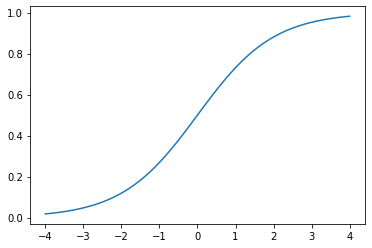

In [ ]:
# 여러 가지 활성화 함수
import numpy as np
import matplotlib.pyplot as plt
import math

# Sigmoid Function
def sigmoid(x) :
  return 1 / (1 + np.exp(-x))

# tanh Function
def tanh(x) :
  return list(map(lambda x : math.tanh(x), x))

# Relu Function
def relu(x) :
  result = []
  for ele in x :
    if(ele <= 0) :
      result.append(0)
    else :
      result.append(ele)

  return result

# Sigmoid Function 그려보기
x = np.linspace(-4, 4, 100)
sig = sigmoid(x) # 함수를 변경하여 다른 함수 그리기
plt.plot(x, sig)
plt.show()

**3.2.3 경사하강법**

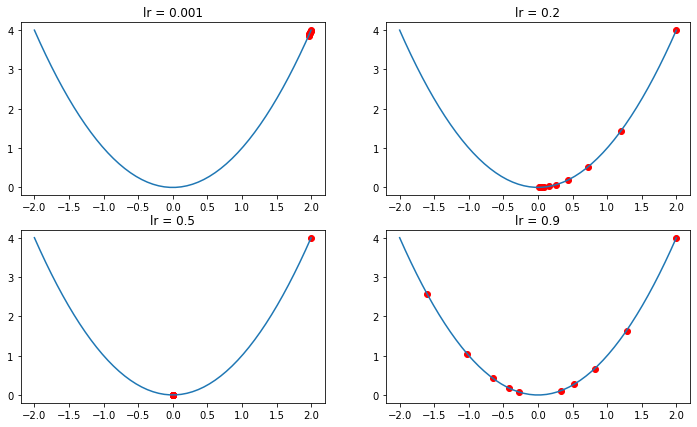

In [ ]:
# 경사하강법 실험해보기
import numpy as np
import matplotlib.pyplot as plt

lr_list = [0.001, 0.2, 0.5, 0.9] # 여러 가지 학습률을 사용하여 값의 변화 관찰

def get_derivative(lr) :
  w_old = 2
  derivative = [w_old]

  y = [w_old ** 2] # 손실 함수를 y = x^2로 정의

  for i in range(1, 10) :
    # 해당 위치에서 미분값 구하기
    dev_value = w_old * 2

    # 위의 값을 이용하여 가중치를 업데이트
    w_new = w_old - lr * dev_value
    w_old = w_new

    derivative.append(w_old)
    y.append(w_old ** 2)

  return derivative, y

x = np.linspace(-2, 2, 50) # -2~2의 범위를 50구간으로 나눈 배열 변환
x_square = [i ** 2 for i in x]

fig = plt.figure(figsize = (12, 7))

for i, lr in enumerate(lr_list) :
  derivative, y = get_derivative(lr)
  ax = fig.add_subplot(2, 2, i + 1)
  ax.scatter(derivative, y, color = 'red')
  ax.plot(x, x_square)
  ax.title.set_text('lr = ' + str(lr))
    
plt.show()